In [ ]:
import pandas as pd

from matplotlib import pyplot as plt

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%a\n%m/%d')

from datetime import date

In [10]:
import seaborn as sns

In [2]:
path = r"C:\cygwin64\home\dries\scripts\covid-19-data\us-counties.csv"

covid = pd.read_csv(path)

In [3]:
path = r"C:\Users\dries\Downloads\PEP_2018_PEPANNCHG.ST05_with_ann.csv"

pop = pd.read_csv(path, encoding='latin1')

pop = pop.rename(columns={'GC.target-geo-id2':'fips',
                'respop72018':'population'})

pop = pop[['fips','population']]

pop = pop.loc[1:]

pop['population'] = pd.to_numeric(pop['population'])
pop['fips'] = pd.to_numeric(pop.fips)

In [4]:
covid = covid.merge(pop)

covid['date'] = pd.to_datetime(covid.date)

covid['casepercap'] = covid.cases/covid['population']

In [47]:
covid = covid.sort_values(by=['fips','date']).reset_index(drop=True)

In [56]:
covid = covid.loc[covid.cases >= 10]

In [57]:
covid ['num_days'] = (covid.date - covid.groupby(['fips'])['date'].transform('min')).dt.days

In [69]:
covid.loc[covid.num_days == 10].sort_values('cases')

,date,county,state,fips,cases,deaths,population,casepercap,num_days
13000,2020-03-05,Bexar,Texas,48029.0,11,0,1986049,0.000006,10
1700,2020-03-07,Solano,California,6095.0,12,0,446610,0.000027,10
8599,2020-02-27,Douglas,Nebraska,31055.0,13,0,566880,0.000023,10
11658,2020-03-27,Cumberland,Pennsylvania,42041.0,16,0,251423,0.000064,10
2187,2020-03-22,Pitkin,Colorado,8097.0,16,0,17950,0.000891,10
...,...,...,...,...,...,...,...,...,...
7157,2020-03-25,Oakland,Michigan,26125.0,543,10,1259201,0.000431,10
9733,2020-03-24,Rockland,New York,36087.0,671,5,325695,0.002060,10
9675,2020-03-26,Orange,New York,36071.0,751,2,381951,0.001966,10
9809,2020-03-22,Suffolk,New York,36103.0,1034,12,1481093,0.000698,10


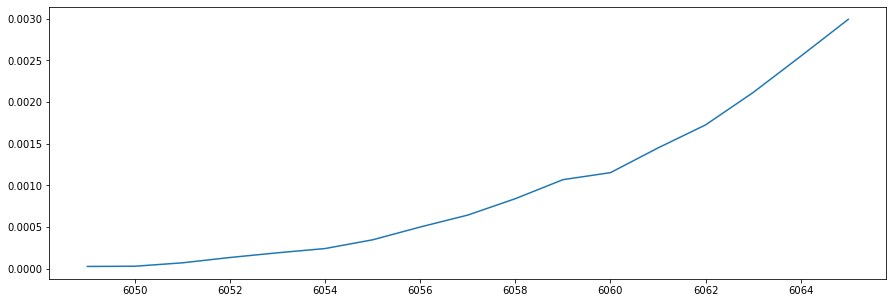

In [72]:
covid.loc[covid.county == 'Orleans'].casepercap.plot()


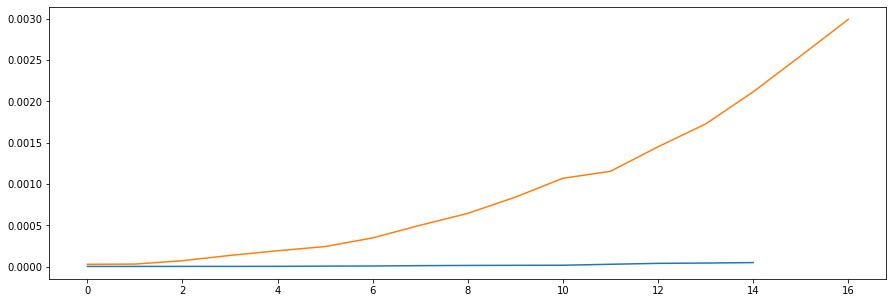

In [79]:
fig, ax = plt.subplots()
ax.plot(covid.loc[covid.county == 'Harris']['casepercap'].values)
ax.plot(covid.loc[covid.county == 'Orleans']['casepercap'].values)

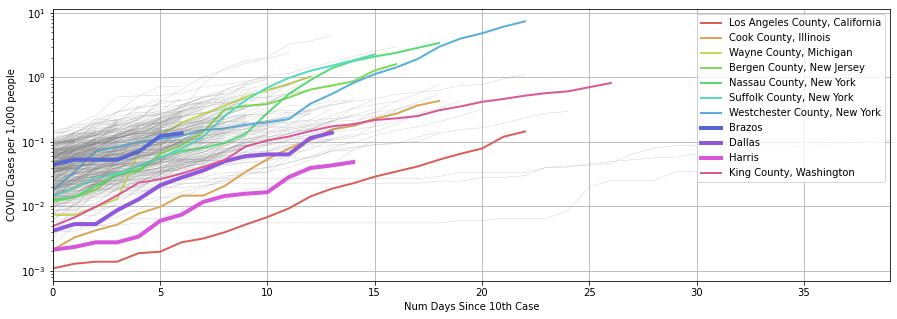

In [83]:
worst = covid.groupby('fips').cases.max().reset_index().sort_values('cases').tail(8).fips.values

colors = iter(sns.color_palette('hls', 3 + len(worst)))

biguns = covid.loc[covid.population >= 100e3].fips.unique().tolist()

plt.rcParams['figure.figsize'] = 15, 5
fig, ax = plt.subplots()

for fips in biguns:
    county = covid.loc[covid.fips == fips].county.unique()[0]
    state = covid.loc[covid.fips == fips].state.unique()[0]    
    
    if fips in worst:
        label = county + ' County, ' + state
        color = next(colors)
        lw, alpha = (2, 1)
    elif county in ['Harris','Dallas','Brazos']:
        label = county
        color = next(colors)
        lw, alpha = (4, 1)
    else:
        label = None
        color='gray'
        lw, alpha = (0.4, 0.4)
    
    #ax.plot(covid.loc[covid.fips == fips]['date'],
    ax.plot(covid.loc[covid.fips == fips]['num_days'],
            covid.loc[covid.fips == fips]['casepercap'] * 1e3, 
            label=label,
            color=color,
            lw=lw,
            alpha=alpha
            )

#ax.set_xlim([pd.to_datetime('15feb2020'),pd.to_datetime(date.today())])
#ax.xaxis.set_major_formatter(myFmt)
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(mdates.MO))

ax.set_xlim([0, covid.num_days.max()])
ax.set_yscale('log')

ax.set_ylabel('COVID Cases per 1,000 people')
ax.set_xlabel('Num Days Since 10th Case')
ax.legend()
ax.grid()

plt.savefig(r'c:\users\dries\graph.png')